### objective: analysis on rented properties in different location using magicbricks website

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import time


price = []
area_name = []
Bathrooms = []
furniture = []
tenant_preference = []
floor = []


urls = [
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Hyderabad',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Bangalore',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=New-Delhi',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Mumbai',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Kolkata',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Chennai',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Patna',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Bhopal',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Pune',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Lucknow',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Goa',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Jaipur',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Pondicherry',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Shimla',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Gurgaon',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Gandhinagar',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Dehradun'
]

request_header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

start = time.time()

for url in urls:
    
    page = requests.get(url, headers=request_header)
    pagecontent = page.text

    
    soup = BeautifulSoup(pagecontent, 'html.parser')

    
    for x in soup.find_all('div', attrs={'class': 'mb-srp__card'}):
        area = x.find('h2', attrs={'class': 'mb-srp__card--title'})
        prices = x.find('div', attrs={'class': 'mb-srp__card__price--amount'})
        Bathroom = x.find('div', class_='mb-srp__card__summary__list--item', attrs={'data-summary': 'bathroom'})
        furnishing_elements = x.find('div', class_='mb-srp__card__summary__list--item', attrs={'data-summary': 'furnishing'})
        tenant_preferences = x.find('div', class_='mb-srp__card__summary__list--item', attrs={'data-summary': 'tenent-preffered'})
        floors = x.find('div', class_='mb-srp__card__summary__list--item', attrs={'data-summary': 'floor'})
        
        if area is None:
            area_name.append(np.NaN)
        else:
            area_name.append(area.get('title', np.NaN))

        if prices is None:
            price.append(np.NaN)
        else:
            price.append(prices.text.strip())
        
        if Bathroom is None:
            Bathrooms.append(np.NaN)
        else:
            value = Bathroom.find('div', class_='mb-srp__card__summary--value')
            Bathrooms.append(value.text.strip() if value else np.NaN)
        
        if furnishing_elements is None:
            furniture.append(np.NaN)
        else:
            value = furnishing_elements.find('div', class_='mb-srp__card__summary--value')
            furniture.append(value.text.strip() if value else np.NaN)
        
        if tenant_preferences is None:
            tenant_preference.append(np.NaN)
        else:
            value = tenant_preferences.find('div', class_='mb-srp__card__summary--value')
            tenant_preference.append(value.text.strip() if value else np.NaN)
        
        if floors is None:
            floor.append(np.NaN)
        else:
            value = floors.find('div', class_='mb-srp__card__summary--value')
            floor.append(value.text.strip() if value else np.NaN)

end = time.time()
print(f"Time taken: {end - start} seconds")

# Print the extracted data for verification
for i in range(len(area_name)):
    print(f"Area: {area_name[i]}, Price: {price[i]}, Bathrooms: {Bathrooms[i]}, Furniture: {furniture[i]}, Tenant Preference: {tenant_preference[i]}, Floor: {floor[i]}")


In [105]:
### columns
## 1) price
## 2) area
## 3) furniture
## 4) bathrooms
## 5) tenant-preferences
## 6) flat
## 7) location
## 8) floor

In [1]:
import pandas as pd
df=pd.read_csv('magicbricks6.csv')

In [2]:
df.head()

,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location,Area,Total Floors
0,70000,3.0,Semi-Furnished,Bachelors,19,3,Hyderabad,Kokapet,35.0
1,55000,3.0,Furnished,Bachelors/Family,18,3,Hyderabad,Nalagandla,20.0
2,16000,1.0,Semi-Furnished,Bachelors,2,1,Hyderabad,Kondapur,5.0
3,29000,3.0,Semi-Furnished,Bachelors,20,3,Hyderabad,Masjid Banda,20.0
4,90000,3.0,Semi-Furnished,Family,9,3,Hyderabad,Gachibowli,24.0


In [3]:
df.isnull().sum()

Price                0
Bathrooms            1
Furniture            1
Tenant Preference    0
Floor                0
Flat                 0
Location             0
Area                 0
Total Floors         0
dtype: int64

In [4]:
df.shape

(510, 9)

In [5]:
df.dtypes

Price                  int64
Bathrooms            float64
Furniture             object
Tenant Preference     object
Floor                  int64
Flat                   int64
Location              object
Area                  object
Total Floors         float64
dtype: object

In [6]:
df.describe()

,Price,Bathrooms,Floor,Flat,Total Floors
count,510.000000,509.000000,510.000000,510.000000,510.000000
mean,34818.425490,2.369352,4.770588,2.466667,10.800000
std,23128.560477,0.766629,7.026495,0.652836,12.054363
min,3500.000000,1.000000,0.000000,1.000000,1.000000
25%,18000.000000,2.000000,1.000000,2.000000,3.000000
50%,29000.000000,2.000000,2.000000,3.000000,6.000000
75%,46875.000000,3.000000,6.000000,3.000000,14.000000
max,110000.000000,5.000000,70.000000,3.000000,77.000000


In [12]:
df['Total Floors'].fillna(method='bfill',inplace=True)

In [13]:
df.isnull().sum()

Price                0
Bathrooms            1
Furniture            1
Tenant Preference    0
Floor                0
Flat                 0
Location             0
Area                 0
Total Floors         0
dtype: int64

In [14]:
df['Total Floors'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
505    False
506    False
507    False
508    False
509    False
Name: Total Floors, Length: 510, dtype: bool

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
numeric_columns=df.select_dtypes(include=['int','float']).columns

In [17]:
numeric_columns

Index(['Price', 'Bathrooms', 'Floor', 'Flat', 'Total Floors'], dtype='object')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


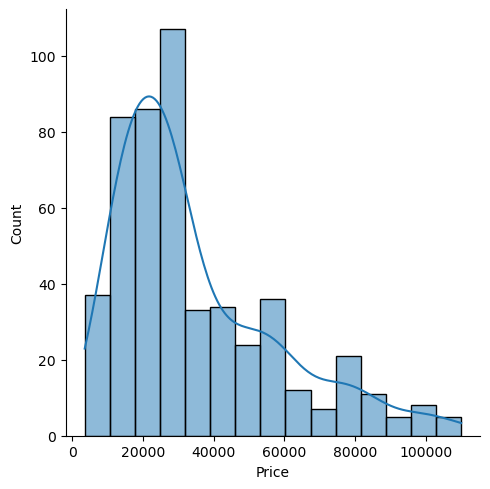

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


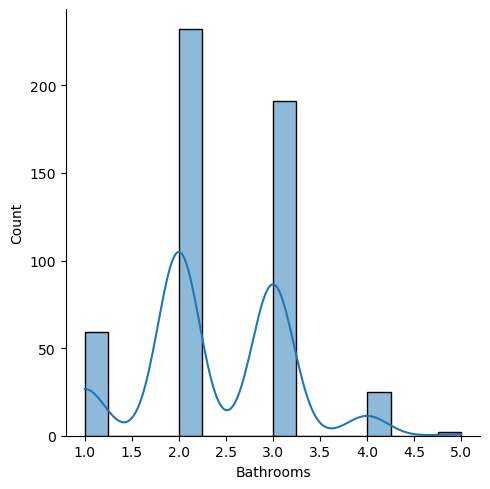

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


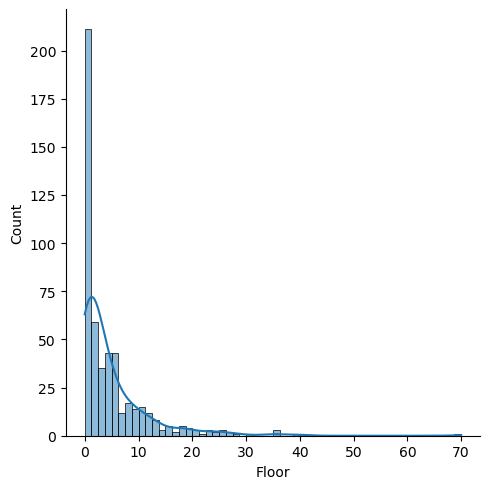

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


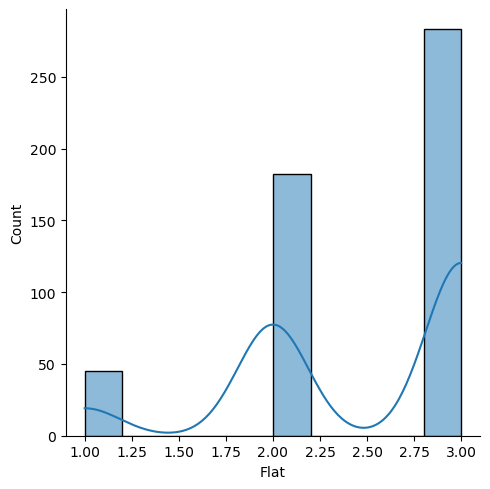

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


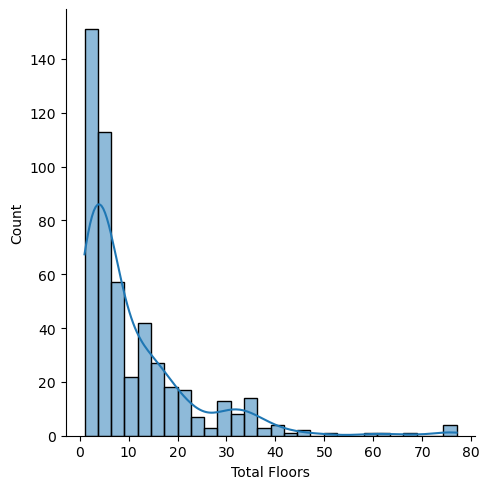

In [18]:
### hist plot for all numeric values
for cols in numeric_columns:
    sns.displot(x=df[cols],kde=True)
    plt.show()

<Axes: xlabel='Price'>

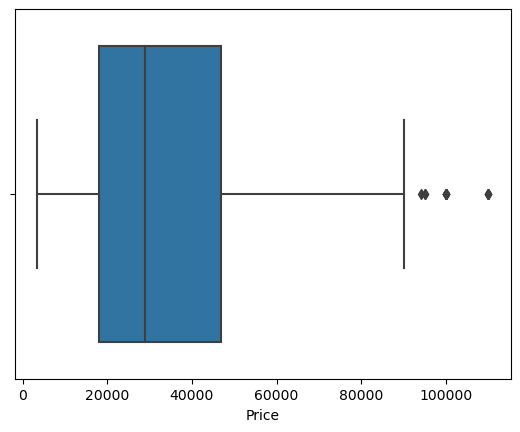

In [19]:
### box plot for price and bathrooms
sns.boxplot(x=df['Price'])

<Axes: xlabel='Bathrooms'>

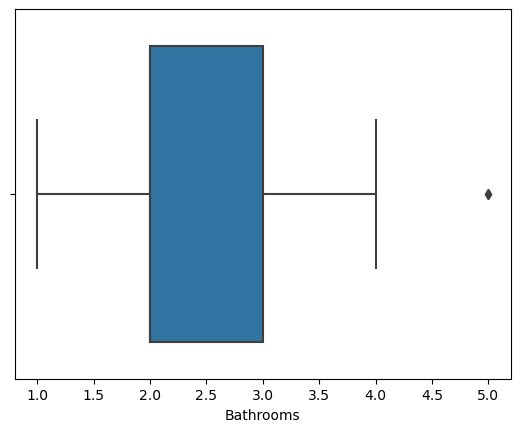

In [20]:
sns.boxplot(x=df['Bathrooms'])

<Axes: xlabel='Flat'>

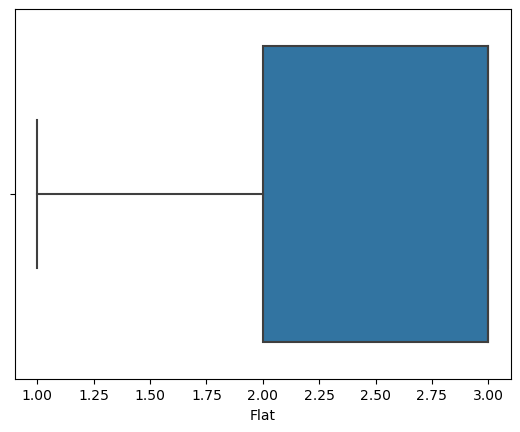

In [21]:
sns.boxplot(x=df['Flat'])

<Axes: xlabel='Flat', ylabel='count'>

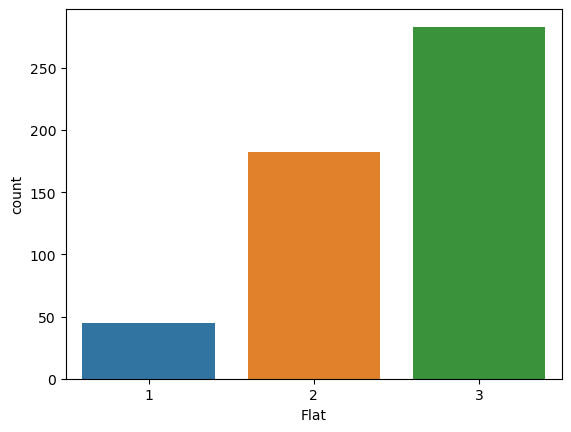

In [22]:
sns.countplot(x='Flat',data=df)

C:\Users\prane\AppData\Local\Temp\ipykernel_8704\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

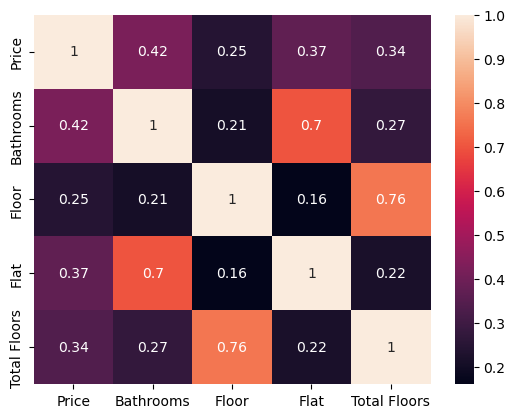

In [56]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Furniture', ylabel='count'>

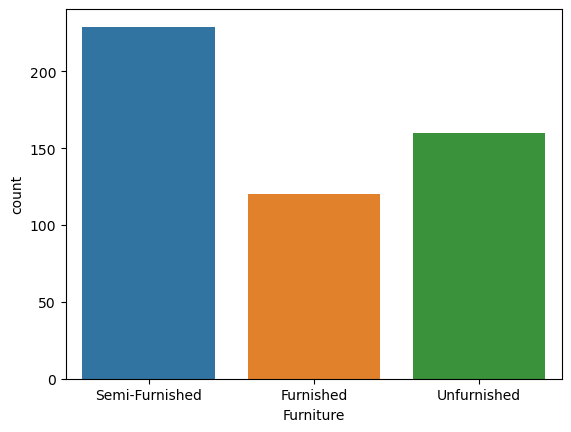

In [23]:
### plots for categorical and numerical plots
## semi-furnished are more than other two 
sns.countplot(x='Furniture',data=df)

<Axes: xlabel='Tenant Preference', ylabel='count'>

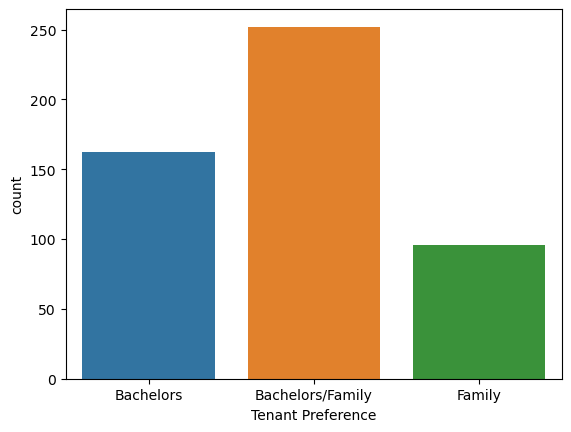

In [24]:
## bacheilors/family tenant preferences are more than other two
sns.countplot(x='Tenant Preference',data=df)

In [25]:
### relation between price and bathrooms
df1=df.groupby('Bathrooms')['Price'].mean().reset_index()

In [26]:
df1

,Bathrooms,Price
0,1.0,18623.728814
1,2.0,28205.168103
2,3.0,46361.246073
3,4.0,46000.000000
4,5.0,50000.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


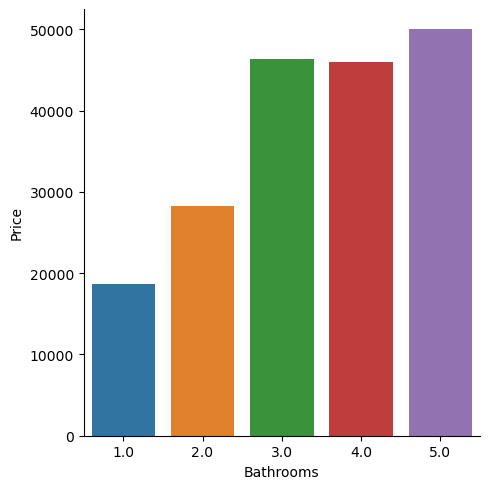

In [27]:
sns.catplot(x='Bathrooms',y='Price',data=df1,kind='bar')
## as we can when bathrooms increases the price also increases and in some places the prices may decrease

In [28]:
## relationship between furniture and price
df2=df.groupby('Furniture')['Price'].mean().reset_index()

In [29]:
df2

,Furniture,Price
0,Furnished,38390.825000
1,Semi-Furnished,35300.427948
2,Unfurnished,31604.375000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


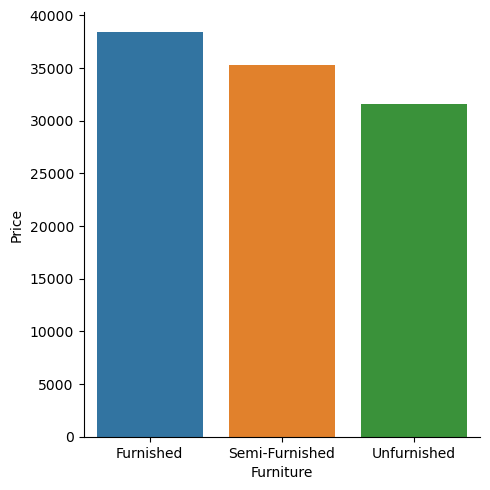

In [30]:
sns.catplot(x='Furniture',y='Price',data=df2,kind='bar')
## as the furnished increases the price is increasing

In [3]:
## relationship between tenant preferences and price
df3=df.groupby('Tenant Preference')['Price'].mean().reset_index()

In [4]:
df3

,Tenant Preference,Price
0,Bachelors,31837.037037
1,Bachelors/Family,35701.976190
2,Family,37530.197917


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


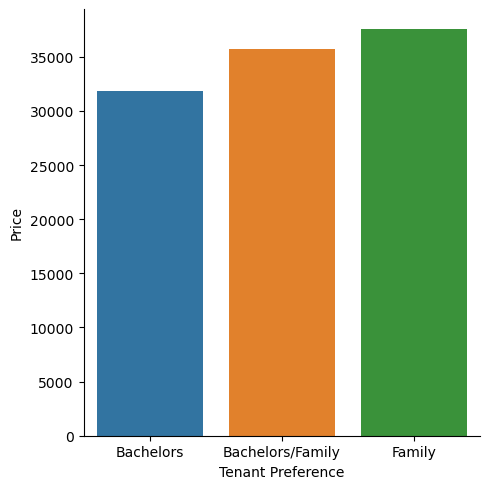

In [9]:
sns.catplot(x='Tenant Preference',y='Price',kind='bar',data=df3)

In [33]:
## relationship between flat and price
df4=df.groupby('Flat')['Price'].mean().reset_index()

In [34]:
df4

,Flat,Price
0,1,23640.000000
1,2,24730.769231
2,3,43083.381625


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


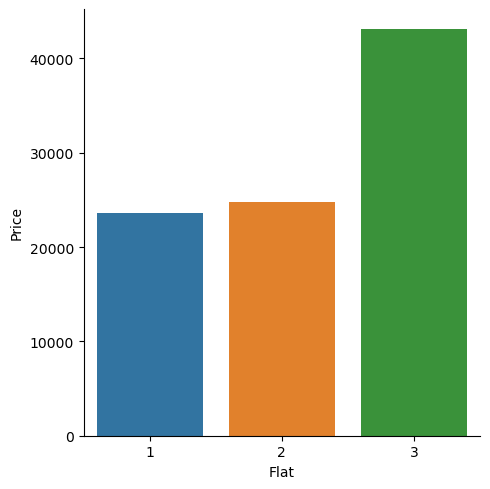

In [35]:
sns.catplot(x='Flat',y='Price',data=df4,kind='bar')
## as the flat type increases the price also increases

In [36]:
## relationship between floor and price
df5=df.groupby('Floor')['Price'].mean().reset_index()

In [37]:
df5

,Floor,Price
0,0,29062.931034
1,1,26109.463158
2,2,31262.711864
3,3,37254.285714
4,4,35174.395349
5,5,38940.000000
6,6,38250.000000
7,7,49166.666667
8,8,46023.529412
9,9,46571.428571


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

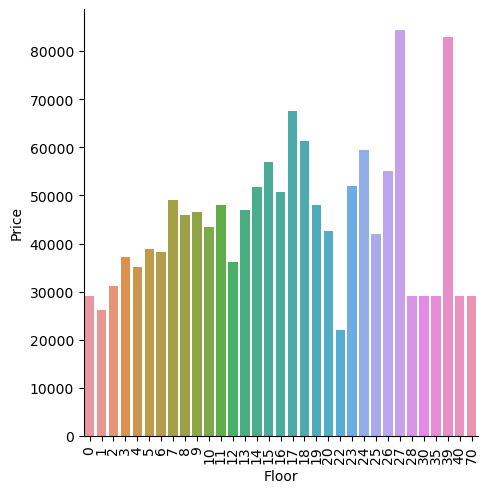

In [38]:
plt.figure(figsize=(10,5))
sns.catplot(x='Floor',y='Price',data=df5,kind='bar')
plt.xticks(rotation=90)
plt.show()
### as the floor incrases the price value will be changing 

In [39]:
## relationship between location and price
df6=df.groupby(by='Location')['Price'].mean().reset_index()

In [40]:
df6

,Location,Price
0,Bangalore,54950.000000
1,Bhopal,19583.333333
2,Chennai,40700.000000
3,Dehradun,24800.000000
4,Delhi,49289.966667
5,Gandhinagar,27233.300000
6,Goa,46133.333333
7,Gurgaon,54233.333333
8,Hyderabad,51393.333333
9,Jaipur,29416.666667


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

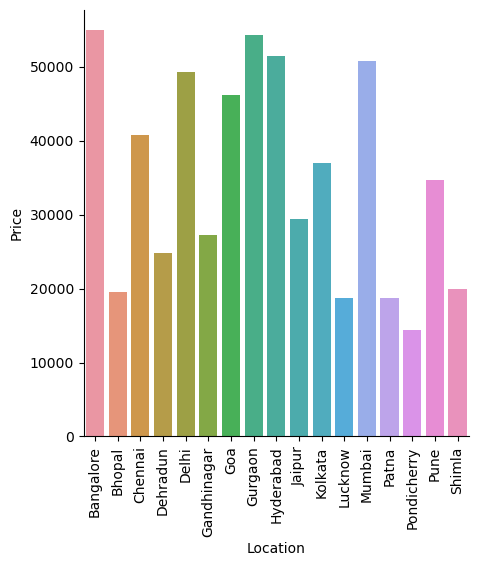

In [41]:
plt.figure(figsize=(10,5))
sns.catplot(x='Location',y='Price',data=df6,kind='bar')
plt.xticks(rotation=90)
plt.show()
##we can see the top 3  highest rented locations in terms of price mumbai,banglore,gurgaon

In [42]:
### relationship between flat,bathroom,price
price_flatbathroom = df.groupby(by=['Flat','Bathrooms'])['Price'].mean().reset_index()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


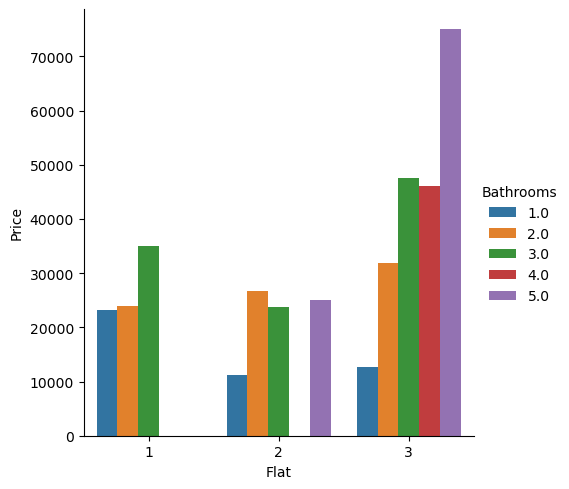

In [43]:
sns.catplot(x='Flat',y='Price',hue='Bathrooms',data=price_flatbathroom,kind='bar')
## as the flat type and no.of bathroom increase prices will aslo incrases based on the location

In [44]:
### relationship between bathrooms,flat as index and location as column and price as value
pivottable=df.pivot_table(index=['Bathrooms','Flat'],columns='Location',values='Price',aggfunc='mean').reset_index()
pivottable.fillna(0,inplace=True)

In [45]:
pivottable

Location,Bathrooms,Flat,Bangalore,Bhopal,Chennai,Dehradun,Delhi,Gandhinagar,Goa,Gurgaon,Hyderabad,Jaipur,Kolkata,Lucknow,Mumbai,Patna,Pondicherry,Pune,Shimla
0,1.0,1,35000.000000,0.000000,9750.000000,19666.666667,64000.000000,0.000000,28833.333333,95000.000000,16000.000000,14833.333333,0.000000,11500.000000,50000.000000,0.000000,8600.000000,21500.000000,11785.714286
1,1.0,2,0.000000,12000.000000,7000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,0.000000,10500.000000,11625.000000,0.000000,11500.000000,10500.000000,0.000000,12000.000000
2,1.0,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12000.000000,13000.000000,0.000000,0.000000
3,2.0,1,29000.000000,0.000000,17000.000000,0.000000,27500.000000,0.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50000.000000,0.000000,9000.000000,19500.000000,0.000000
4,2.0,2,45250.000000,15863.636364,16642.857143,21857.142857,34000.000000,24846.153846,49000.000000,56600.000000,15950.000000,17863.636364,26300.000000,15428.571429,65128.571429,14100.000000,12833.333333,28136.363636,32500.000000
5,2.0,3,64666.666667,20666.666667,55000.000000,23000.000000,40028.428571,50000.000000,36666.666667,52000.000000,56975.000000,20000.000000,28687.500000,20250.000000,48600.000000,18076.923077,15666.666667,57500.000000,19700.000000
6,3.0,1,0.000000,0.000000,0.000000,0.000000,35000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,3.0,2,0.000000,20500.000000,0.000000,26500.000000,0.000000,0.000000,45000.000000,0.000000,21000.000000,0.000000,0.000000,20000.000000,0.000000,0.000000,16500.000000,0.000000,0.000000
8,3.0,3,57973.684211,23166.666667,59666.666667,32125.000000,65000.000000,27749.937500,62428.571429,52777.777778,58588.235294,37409.090909,59333.222222,28750.000000,47571.428571,33600.000000,27333.333333,44727.272727,0.000000
9,4.0,3,54000.000000,20000.000000,28000.000000,0.000000,29000.000000,0.000000,54500.000000,43000.000000,59750.000000,52500.000000,60000.000000,60000.000000,29000.000000,0.000000,0.000000,0.000000,0.000000


In [46]:
pivottable_melted = pivottable.melt(id_vars=['Bathrooms', 'Flat'], var_name='Location', value_name='Average Price')

In [47]:
pivottable_melted

,Bathrooms,Flat,Location,Average Price
0,1.0,1,Bangalore,35000.0
1,1.0,2,Bangalore,0.0
2,1.0,3,Bangalore,0.0
3,2.0,1,Bangalore,29000.0
4,2.0,2,Bangalore,45250.0
...,...,...,...,...
199,3.0,2,Shimla,0.0
200,3.0,3,Shimla,0.0
201,4.0,3,Shimla,0.0
202,5.0,2,Shimla,0.0


C:\Users\prane\AppData\Local\Temp\ipykernel_6136\4009511479.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=pivottable_melted, x='Bathrooms', y='Average Price', hue='Location', ci=None)


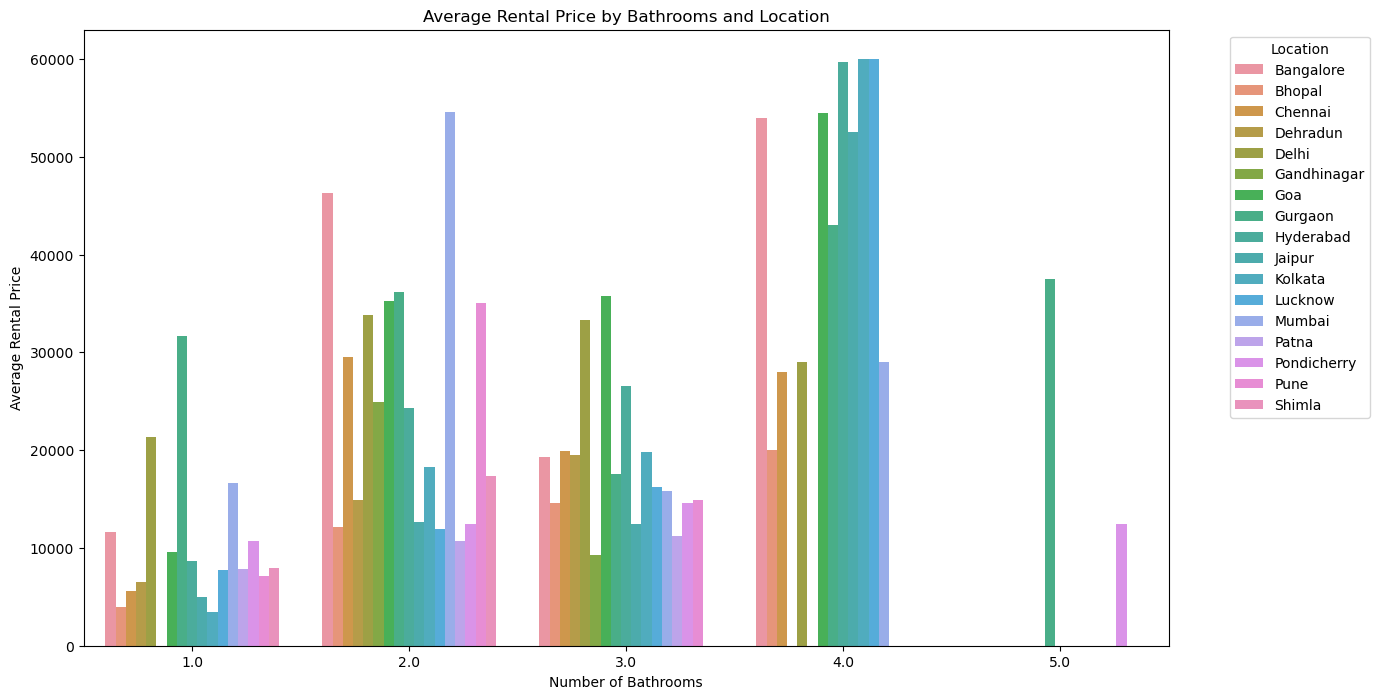

In [48]:
plt.figure(figsize=(14, 8))
sns.barplot(data=pivottable_melted, x='Bathrooms', y='Average Price', hue='Location', ci=None)
plt.title('Average Rental Price by Bathrooms and Location')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Rental Price')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
## based on the bathrooms and location the average rental price will be changing

C:\Users\prane\AppData\Local\Temp\ipykernel_6136\525148205.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=pivottable_melted, x='Flat', y='Average Price', hue='Location', ci=None, palette='muted')


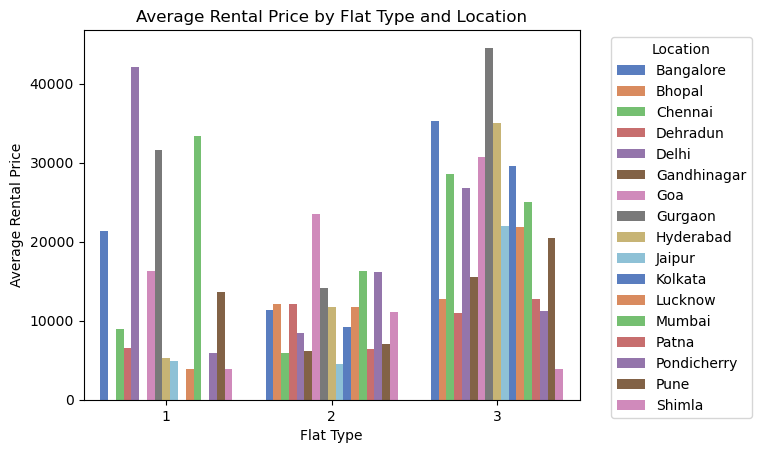

In [49]:
sns.barplot(data=pivottable_melted, x='Flat', y='Average Price', hue='Location', ci=None, palette='muted')
plt.title('Average Rental Price by Flat Type and Location')
plt.xlabel('Flat Type')
plt.ylabel('Average Rental Price')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
### based on the location and flat type the average rental price will be changing

In [50]:
pivottable1 = df.pivot_table(index=['Bathrooms', 'Flat', 'Furniture'], columns='Location', values='Price', aggfunc='mean').reset_index()
pivottable1.fillna(0, inplace=True)

In [51]:
pivottable1

Location,Bathrooms,Flat,Furniture,Bangalore,Bhopal,Chennai,Dehradun,Delhi,Gandhinagar,Goa,Gurgaon,Hyderabad,Jaipur,Kolkata,Lucknow,Mumbai,Patna,Pondicherry,Pune,Shimla
0,1.0,1,Furnished,35000.0,0.0,0.000000,22000.000000,0.000000,0.000000,30000.000000,95000.000000,0.000000,18000.0,0.000000,0.000000,0.000000,0.000000,0.000000,26000.000000,14500.000000
1,1.0,1,Semi-Furnished,0.0,0.0,16000.000000,0.000000,64000.000000,0.000000,18000.000000,0.000000,16000.000000,6500.0,0.000000,8000.000000,50000.000000,0.000000,0.000000,19000.000000,11375.000000
2,1.0,1,Unfurnished,0.0,0.0,3500.000000,15000.000000,0.000000,0.000000,38500.000000,0.000000,0.000000,20000.0,0.000000,15000.000000,0.000000,0.000000,8600.000000,22000.000000,8000.000000
3,1.0,2,Furnished,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,12000.000000,0.000000,0.000000,0.000000,0.000000,16000.000000
4,1.0,2,Semi-Furnished,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,11500.000000,0.000000,15000.000000,12000.000000,0.000000,10000.000000
5,1.0,2,Unfurnished,0.0,12000.0,7000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,0.0,10500.000000,11500.000000,0.000000,10333.333333,9000.000000,0.000000,8000.000000
6,1.0,3,Semi-Furnished,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,12000.000000,10000.000000,0.000000,0.000000
7,1.0,3,Unfurnished,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,16000.000000,0.000000,0.000000
8,2.0,1,Furnished,29000.0,0.0,0.000000,0.000000,27500.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2.0,1,Semi-Furnished,0.0,0.0,17000.000000,0.000000,0.000000,0.000000,20000.000000,0.000000,0.000000,0.0,0.000000,0.000000,50000.000000,0.000000,9000.000000,22000.000000,0.000000


In [52]:
pivottable1_melted = pivottable1.melt(id_vars=['Bathrooms', 'Flat','Furniture'], var_name='Location', value_name='Average Price')

In [53]:
pivottable1_melted

,Bathrooms,Flat,Furniture,Location,Average Price
0,1.0,1,Furnished,Bangalore,35000.0
1,1.0,1,Semi-Furnished,Bangalore,0.0
2,1.0,1,Unfurnished,Bangalore,0.0
3,1.0,2,Furnished,Bangalore,0.0
4,1.0,2,Semi-Furnished,Bangalore,0.0
...,...,...,...,...,...
488,4.0,3,Furnished,Shimla,0.0
489,4.0,3,Semi-Furnished,Shimla,0.0
490,4.0,3,Unfurnished,Shimla,0.0
491,5.0,2,Furnished,Shimla,0.0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x800 with 0 Axes>

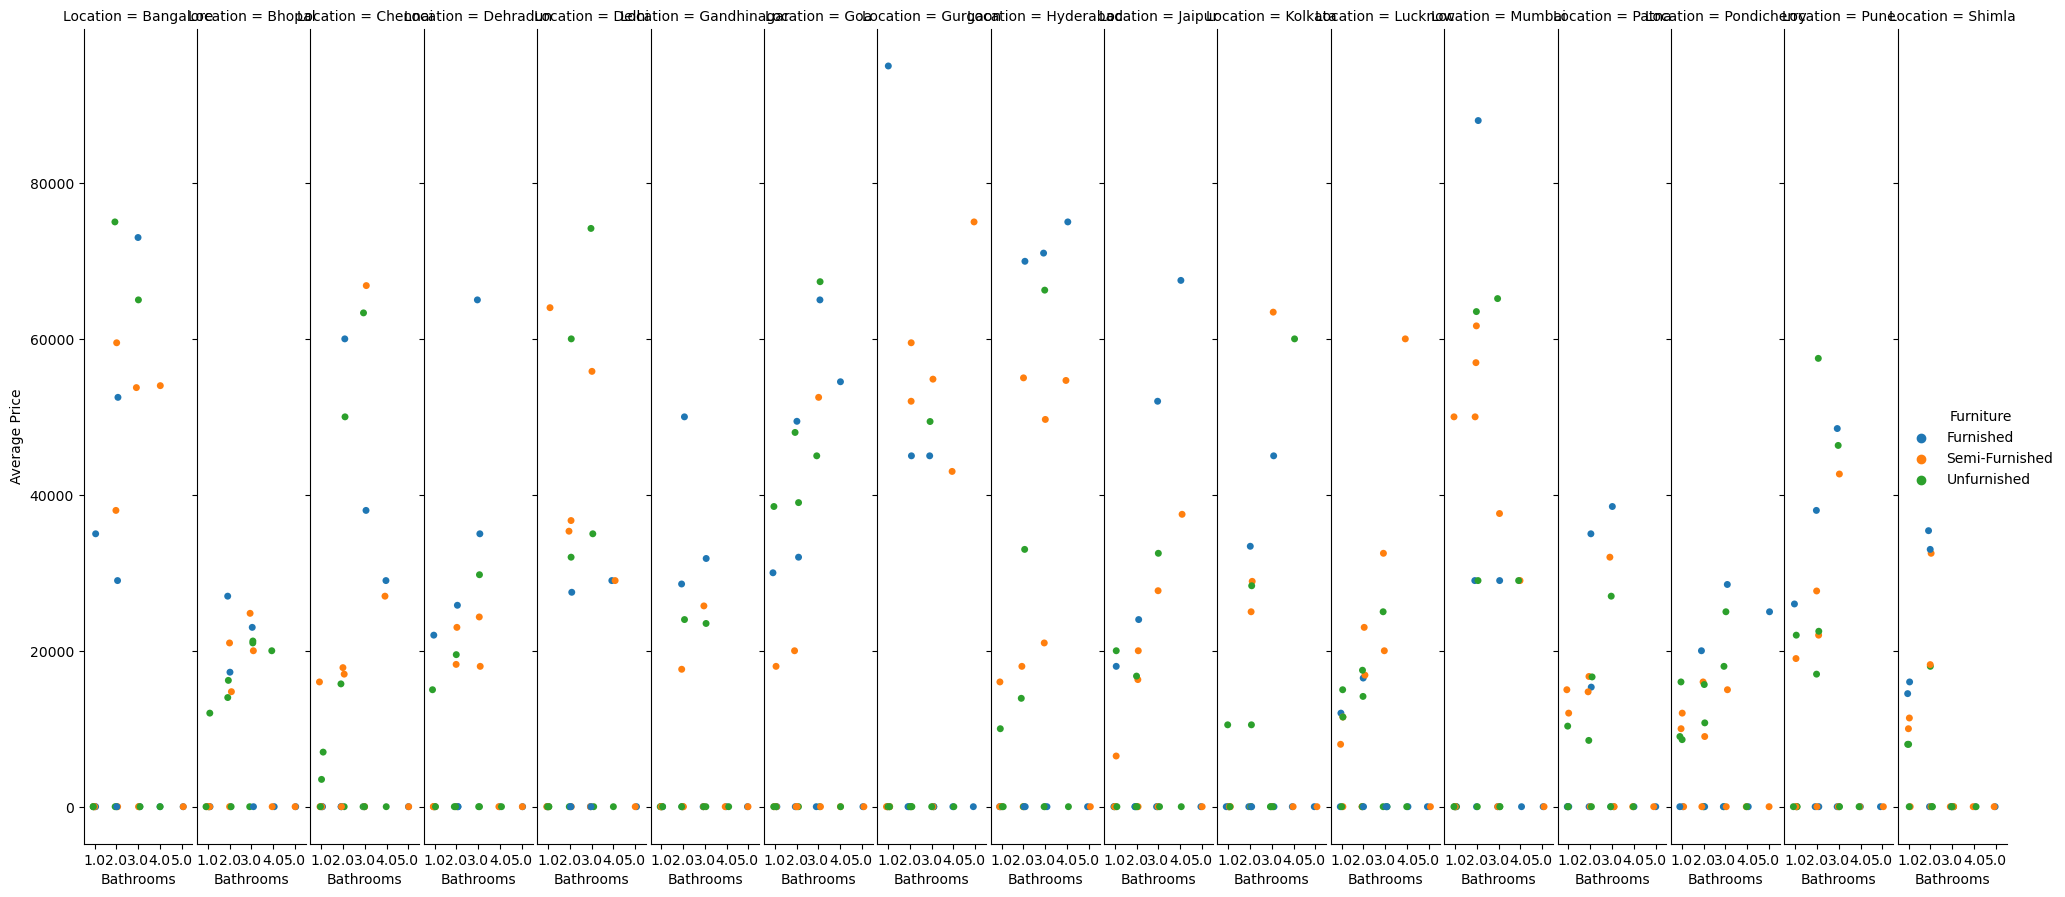

In [54]:
plt.figure(figsize=(14, 8))
g=sns.catplot(x='Bathrooms',y='Average Price',data=pivottable1_melted,hue='Furniture',col='Location',ci=None,height=5,aspect=1)
g.fig.set_size_inches(20, 10)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x800 with 0 Axes>

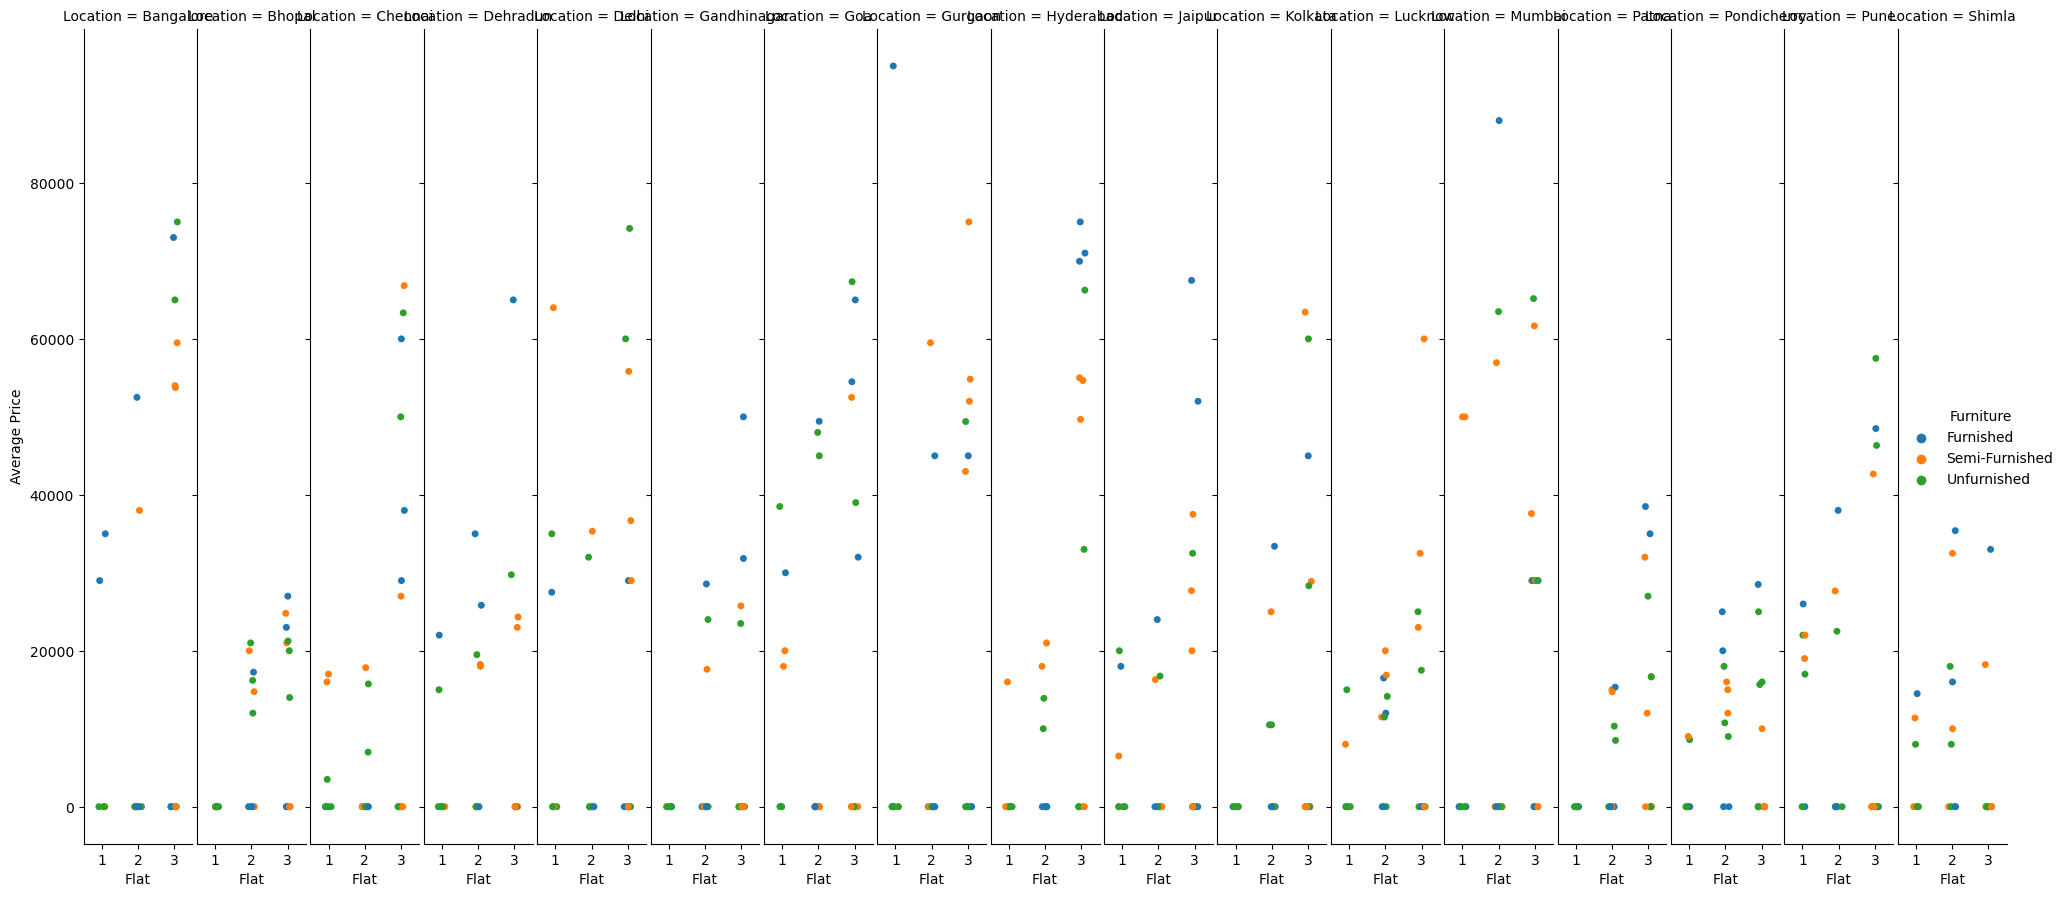

In [55]:
plt.figure(figsize=(14, 8))
g=sns.catplot(x='Flat',y='Average Price',data=pivottable1_melted,hue='Furniture',col='Location',ci=None,height=5,aspect=1)
g.fig.set_size_inches(20, 10)

In [11]:
df.head()

,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location,Area,Total Floors
0,70000,3.0,Semi-Furnished,Bachelors,19,3,Hyderabad,Kokapet,35.0
1,55000,3.0,Furnished,Bachelors/Family,18,3,Hyderabad,Nalagandla,20.0
2,16000,1.0,Semi-Furnished,Bachelors,2,1,Hyderabad,Kondapur,5.0
3,29000,3.0,Semi-Furnished,Bachelors,20,3,Hyderabad,Masjid Banda,20.0
4,90000,3.0,Semi-Furnished,Family,9,3,Hyderabad,Gachibowli,24.0


In [16]:
top_3_cities=df.groupby('Location')['Price'].mean().reset_index()

In [22]:
a=top_3_cities.sort_values(by='Price',ascending=False).head(3)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


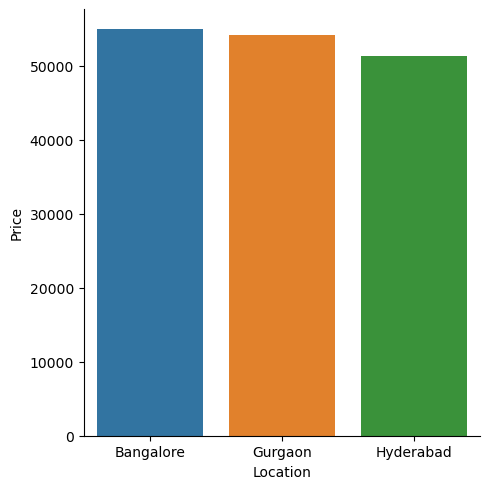

In [24]:
## top 3 cities
sns.catplot(x='Location',y='Price',data=a,kind='bar')

In [25]:
a=top_3_cities.sort_values(by='Price').head(3)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


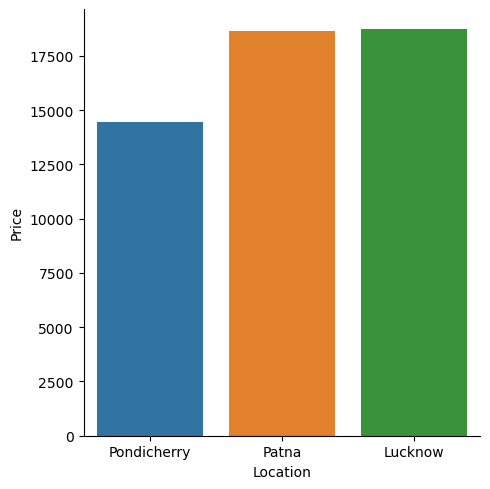

In [26]:
## least three cities
sns.catplot(x='Location',y='Price',data=a,kind='bar')

## conclusion:
#### The rental analysis on the diiferent locations indicates the rental prices. High demand areas such as hyderabad,banglore,mumbai,gurgaon,goa,chennai,delhi are having higher rental prices based on the features such as type of flat,no.of floors,tenant-preferences than other areas. It indicates that  rental properties are lesser available and  in these areas the demand is high.